[[1417.85714286 1414.28571429 1410.         1406.85714286]
 [1411.28571429 1421.71428571 1396.71428571 1408.57142857]
 [1419.42857143 1414.         1415.85714286 1413.28571429]]



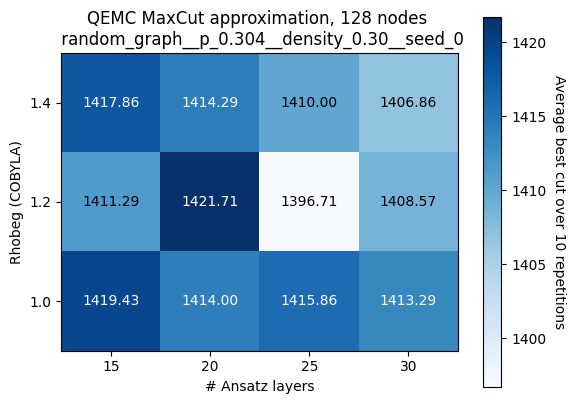

[[1824.85714286 1829.         1826.28571429 1833.14285714]
 [1826.57142857 1814.57142857 1826.28571429 1836.28571429]
 [1820.57142857 1834.28571429 1829.85714286 1815.        ]]



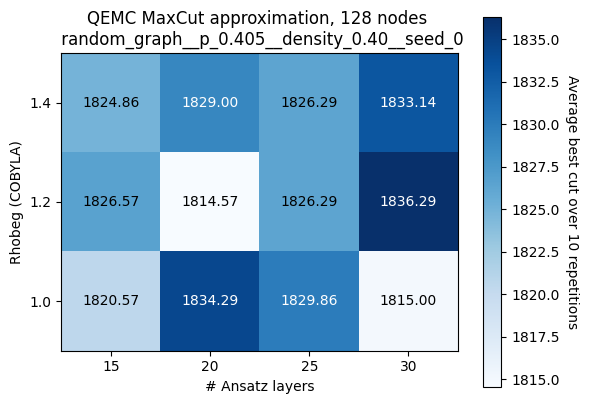

[[2229.42857143 2245.57142857 2244.28571429 2239.14285714]
 [2234.14285714 2235.71428571 2237.71428571 2233.71428571]
 [2236.14285714 2244.85714286 2236.42857143 2235.71428571]]



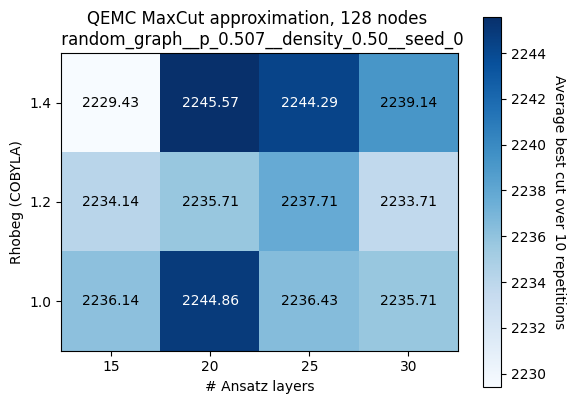

[[2633.         2649.28571429 2630.71428571 2625.42857143]
 [2646.         2640.42857143 2629.71428571 2649.42857143]
 [2635.85714286 2644.85714286 2633.42857143 2636.42857143]]



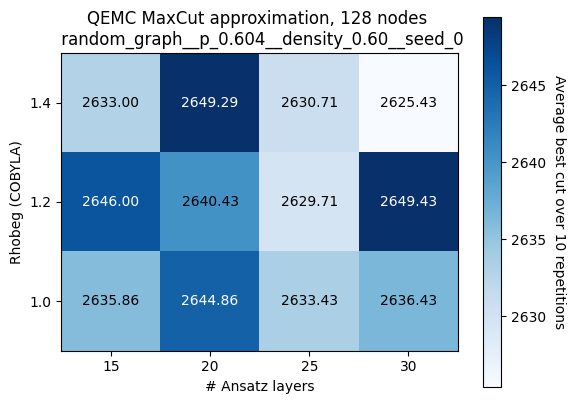

In [8]:
import json
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt


NUM_LAYERS = [15, 20, 25, 30]
RHOBEGS = [1.0, 1.2, 1.4]
LAYERS_DIM = len(NUM_LAYERS)
RHOBEGS_DIM = len(RHOBEGS)

cuts_data = np.zeros((RHOBEGS_DIM, LAYERS_DIM))

data_path = Path(
    "C:/Users/levohad/ohad_work/qemc/EXP_DATA/",
    "ref_29_table3_comparison__iters_5000__rhobegs_1.0_1.2_1.4__layers_15to30__repeats_7"
)

for curated_per_graph_data_path in data_path.rglob("total_backend_configurations_metadata.json"):
    
    with open(curated_per_graph_data_path, "r") as f:
        data = json.load(f)
          
    for configuration_id, configuration_data in data["configurations"].items():
        int_id = int(configuration_id) - 1
    
        num_layers = configuration_data["setting"]["num_layers"]
        layer_id = int_id // RHOBEGS_DIM
#         assert num_layers == NUM_LAYERS[layer_id]
        x_col_layer_id = layer_id
          
          
        rhobeg = configuration_data["setting"]["optimization_options"]["rhobeg"]
        rhobeg_id = int_id % RHOBEGS_DIM
#         assert rhobeg == RHOBEGS[rhobeg_id]
        y_row_rhobeg_id = RHOBEGS_DIM - 1 - rhobeg_id
          
        cuts_data[y_row_rhobeg_id, x_col_layer_id] = configuration_data["average_best_cut"]
          
    print(cuts_data)
    print()
    
    # Create the plot
    fig, ax = plt.subplots()
    im = ax.imshow(cuts_data, cmap="Blues")

    # Create a colorbar to show the value scale
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Average best cut over 10 repetitions", rotation=-90, va="bottom")

    # Add the exact value as text on each tile
    for row_id in range(RHOBEGS_DIM):
        for col_id in range(LAYERS_DIM):

            cut = cuts_data[row_id, col_id]
            
            # Get the RGB background color of the current cell
            cell_rgb = im.cmap(im.norm(cuts_data[row_id, col_id]))[:3]  # RGB values of the background color
            luminance = 0.299 * cell_rgb[0] + 0.587 * cell_rgb[1] + 0.114 * cell_rgb[2]  # Luminance formula

            # Set text color based on luminance
            text_color = 'black' if luminance > 0.5 else 'white'

            text = ax.text(
                col_id,
                row_id,
                f"{cut:.2f}",
                ha="center",
                va="center",
                color=text_color,
            )

    # Set labels and title
    ax.set_title(f"QEMC MaxCut approximation, 128 nodes \n {data['graph']}")
    ax.set_xticks(range(LAYERS_DIM), NUM_LAYERS)
    ax.set_yticks(range(RHOBEGS_DIM), reversed(RHOBEGS))
    ax.set_xlabel("# Ansatz layers")
    ax.set_ylabel("Rhobeg (COBYLA)")

    plt.savefig(Path(curated_per_graph_data_path.parent, "data_grid_search_plot.png"))
    plt.show()